<a href="https://colab.research.google.com/github/ashik-2002/Machine_Learning/blob/main/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dog Breed Classification**
1. **Problem**
- Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

2. **Data**
- The data we're using is from Kaggle's dog breed identification competition.

- https://www.kaggle.com/c/dog-breed-identification/data

3. **Evaluation**
- The evaluation is a file with prediction probabilities for each dog breed of each test image.

- https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

4. Features

- We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
There are 120 breeds of dogs (this means there are 120 different classes).
- There are around 10,000+ images in the training set (these images have labels).
- There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print(f'tensorflow version {tf.__version__}')

tensorflow version 2.12.0


## Loading the data

In [3]:
import pandas as pd
labels_csv = pd.read_csv('/content/drive/MyDrive/Deep Learning/labels.csv')
print(labels_csv.describe)
labels_csv.head()

<bound method NDFrame.describe of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


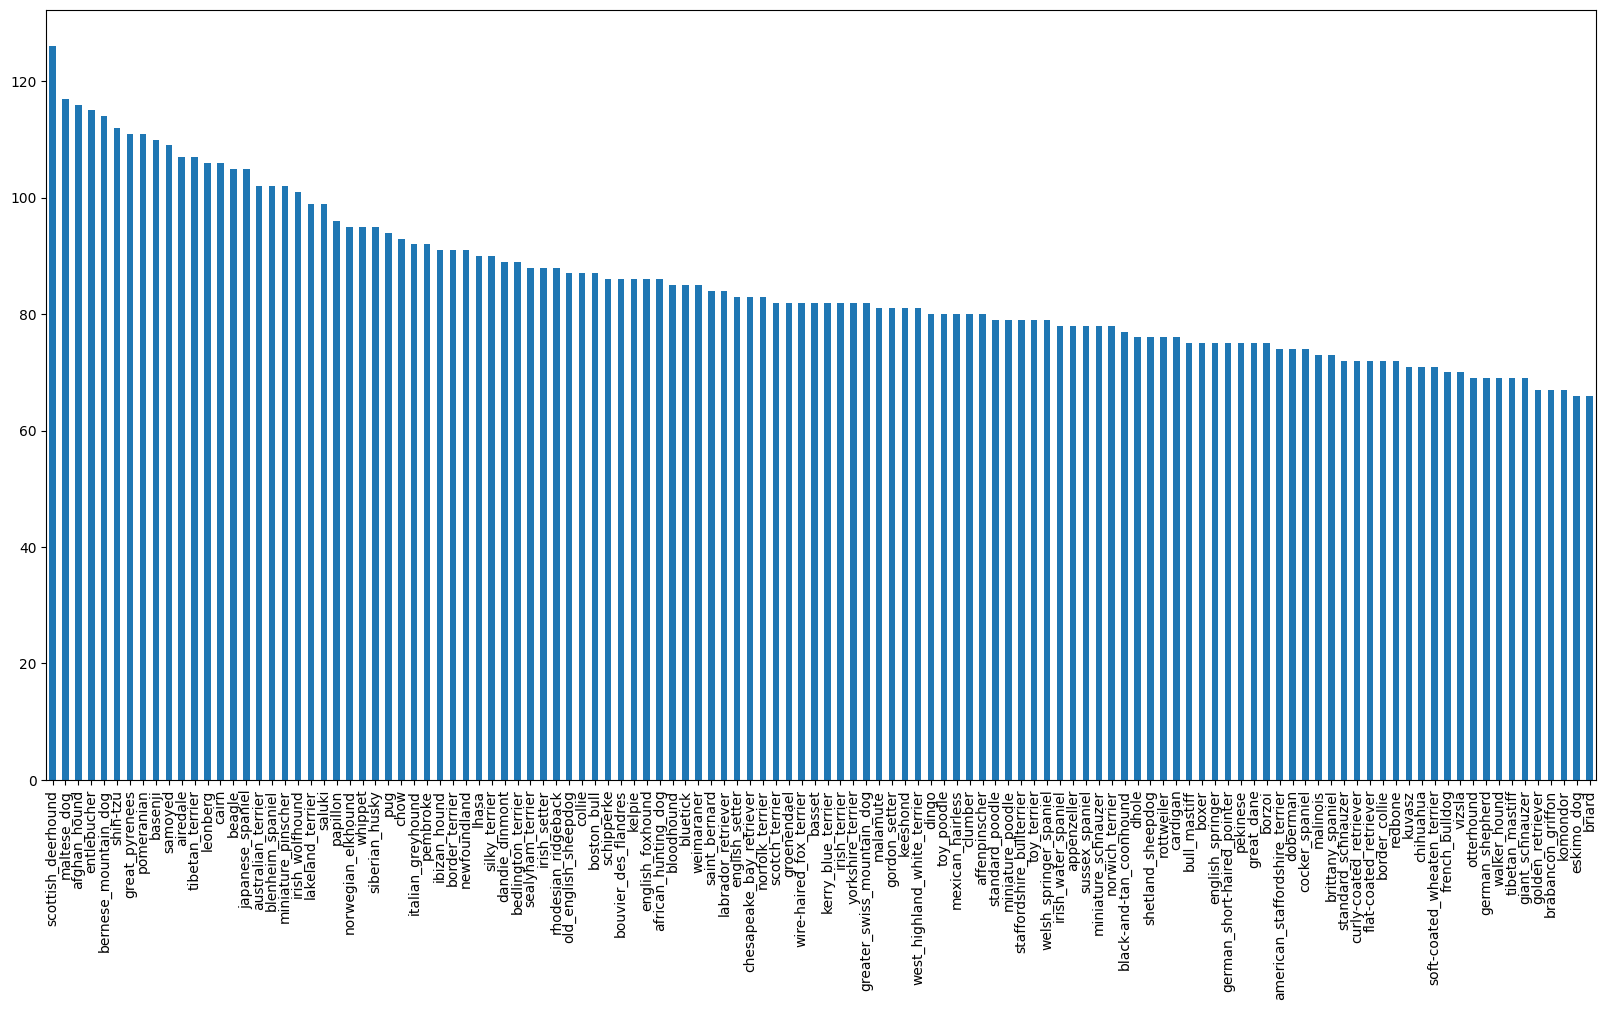

In [4]:
#value counts in column breed and plotting a bar graph
labels_csv.breed.value_counts().plot.bar(figsize=(20,10));

In [5]:
#median number of images per class
labels_csv.breed.value_counts().median()

82.0

### viewing an image

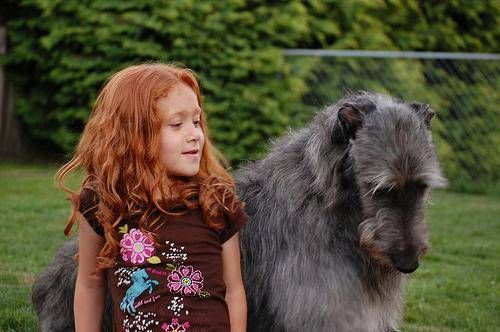

In [6]:

from IPython.display import Image
Image('/content/drive/MyDrive/Deep Learning/train/0042188c895a2f14ef64a918ed9c7b64.jpg')

### Getting Images and their labels

In [7]:
filenames = [fname for fname in labels_csv['id']]
filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [8]:
filenames = ['/content/drive/MyDrive/Deep Learning/train/'+fname +".jpg" for fname in labels_csv['id']]
filenames[:10]

['/content/drive/MyDrive/Deep Learning/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Deep Learning/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Deep Learning/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Deep Learning/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Deep Learning/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Deep Learning/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Deep Learning/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Deep Learning/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Deep Learning/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Deep Learning/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Deep Learning/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


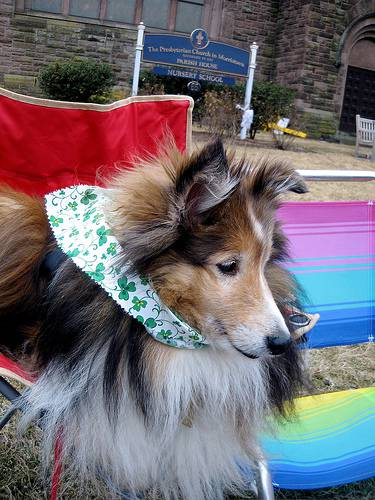

In [10]:
Image(filenames[10])

In [11]:
labels_csv['breed'][45:50]

45            toy_poodle
46        border_terrier
47      lakeland_terrier
48       tibetan_terrier
49    norwegian_elkhound
Name: breed, dtype: object

In [12]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels,len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [14]:
#check number of filenames = labels
if len(filenames) == len(labels):
  print("no. of filenames and label matches")
else:
  print("not matches")

no. of filenames and label matches


In [15]:
#find the unique label values
unique_breeds = np.unique(labels)
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [16]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [19]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
len(boolean_labels)

10222

### Creating Validation set

In [21]:
X = filenames
y = boolean_labels

In [22]:
#set number of images to use for experimenting
NUM_IMAGES = 1000  #@param {type:"slider", min:1000, max:10000, step:1000}

In [23]:
#split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [24]:
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Deep Learning/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Deep Learning/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Deep Learning/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Deep Learning/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Deep Learning/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False

## Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

- Take an image filepath as input
- Use TensorFlow to read the file and save it to a variable, image
- Turn our image (a jpg) into Tensors
- Normalize our image (convert color channel values from from 0-255 to 0-1).
- Resize the image to be a shape of (224, 224)
- Return the modified image


In [25]:
#convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [26]:
image.max(),image.min()

(255, 0)

In [27]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [28]:
#turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [29]:
#function to preprocess images 
IMG_SIZE = 224  #Resize image shape to (224,224)

#preprocess function
def process_image(image_path):

  #Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


## Turning data into batches

In [30]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image, label

In [31]:
process_image(X[42]),tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [32]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

## Create training and validation data batches

In [33]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [34]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [35]:
import matplotlib.pyplot as plt

def show_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

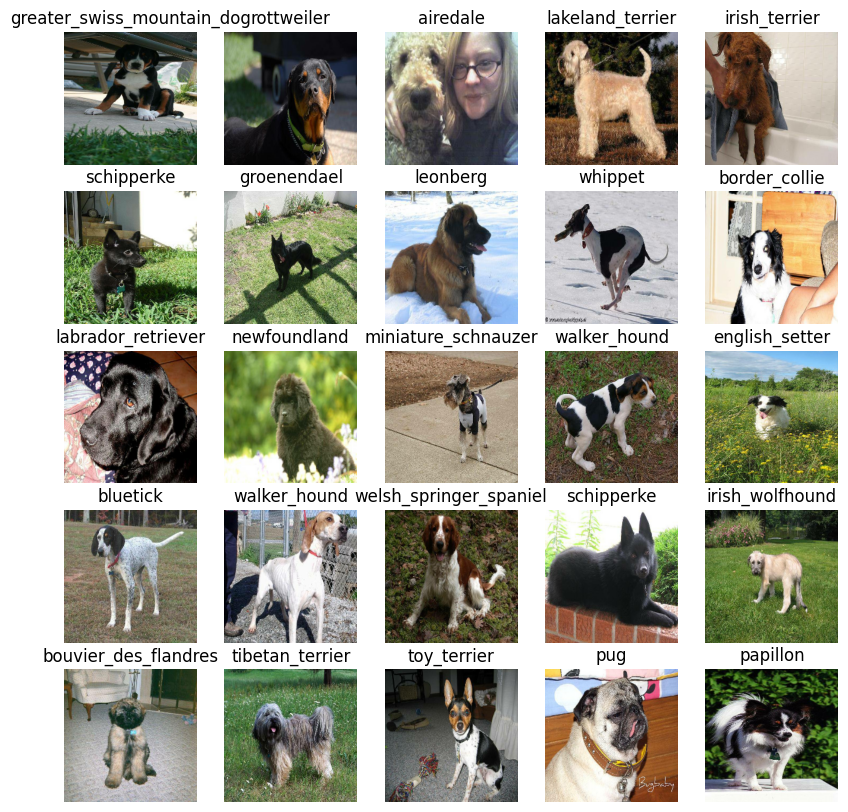

In [36]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

## Building a model

In [37]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [38]:
#mobileNetV2Architecture
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

   # Setup the model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                activation="softmax")
                              ])
  #compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
      )
  #Build the model
  model.build(INPUT_SHAPE)
  return model

In [39]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks

#### TensorBoard Callback

In [40]:
# Loading tensorboard notebook extension
%load_ext tensorboard

In [41]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback

In [42]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Training a model (on a subset of data

In [43]:
NUM_EPOCHS = 100  #@param {type:"slider", min:10,max:100, step:10}

In [44]:
def train_model():

  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard,early_stopping])
  return model

In [45]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 188s 5s/step - loss: 4.5497 - accuracy: 0.0975 - val_loss: 3.4648 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 3s 116ms/step - loss: 1.6599 - accuracy: 0.6988 - val_loss: 2.2073 - val_accuracy: 0.5350
Epoch 3/100
25/25 [==============================] - 3s 134ms/step - loss: 0.5816 - accuracy: 0.9362 - val_loss: 1.7172 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 3s 116ms/step - loss: 0.2552 - accuracy: 0.9850 - val_loss: 1.5291 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 3s 115ms/step - loss: 0.1475 - accuracy: 0.9987 - val_loss: 1.4450 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 3s 114ms/step - loss: 0.1005 - accuracy: 1.0000 - val_loss: 1.3994 - val_accuracy: 0.6750
Epoch 7/100
25/25 [==============================]

## Making and evaluating predictions using a trained model

In [46]:
# Make predictions on the validation data
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 4s 137ms/step


array([[9.91541077e-04, 7.32831395e-05, 1.23404700e-03, ...,
        9.44216517e-05, 7.77974219e-06, 2.17146636e-03],
       [2.91153695e-03, 1.89591417e-04, 1.35155860e-02, ...,
        9.79892866e-05, 1.32271985e-03, 1.31001914e-04],
       [5.48515891e-06, 7.44921927e-05, 3.37294150e-05, ...,
        6.57949204e-06, 7.36608172e-06, 2.54785373e-05],
       ...,
       [1.57120157e-05, 2.15333275e-05, 8.47963965e-05, ...,
        8.53648180e-06, 2.19518370e-05, 3.66144050e-05],
       [2.23852997e-03, 4.24614205e-04, 1.40125776e-04, ...,
        4.15367627e-04, 4.26777442e-05, 3.24149951e-02],
       [3.21089959e-04, 1.37411125e-05, 5.78651624e-03, ...,
        2.71944962e-02, 1.12354732e-03, 4.85103992e-05]], dtype=float32)

In [47]:
predictions.shape

(200, 120)

In [48]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [49]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [50]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

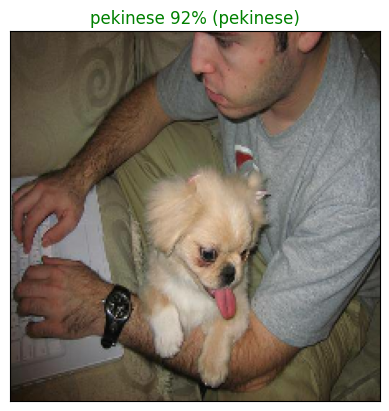

In [51]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,n=82)

In [52]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


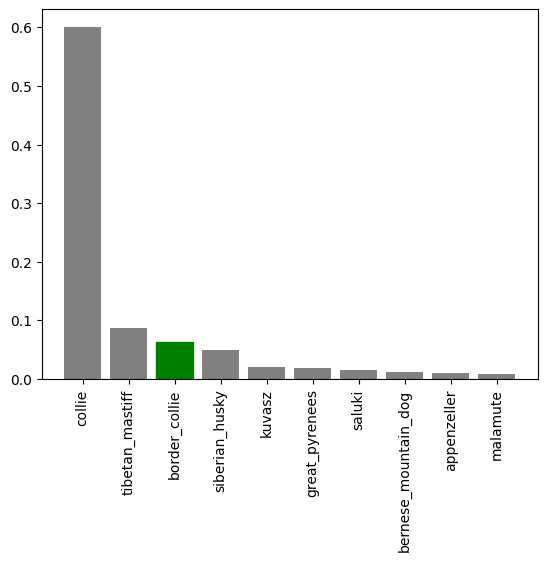

In [53]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

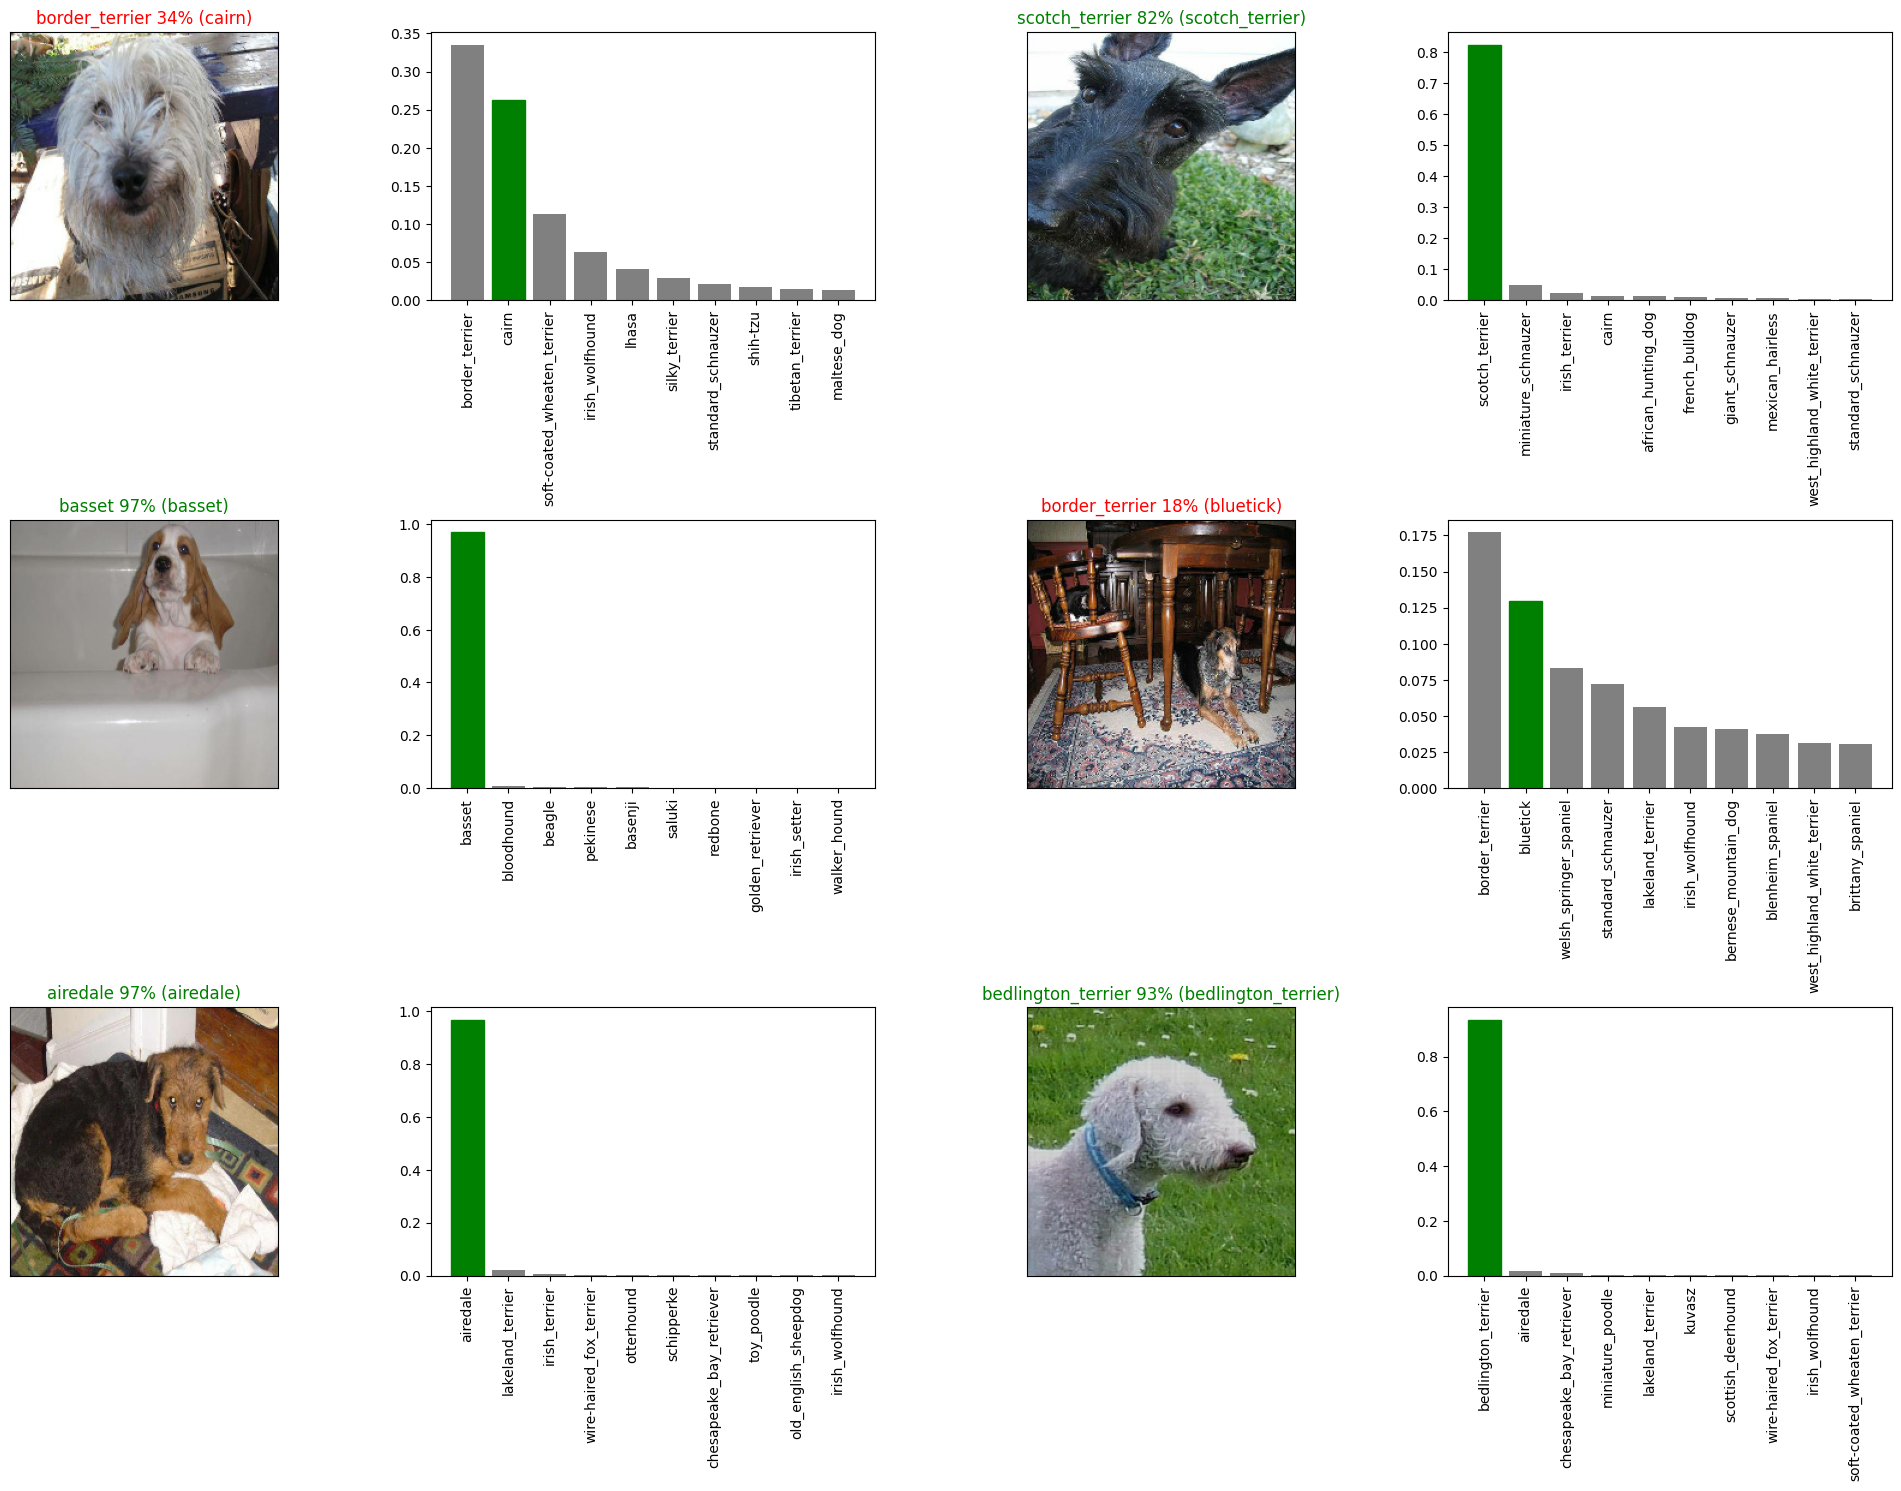

In [54]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

In [55]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/model",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [56]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [57]:
# Save model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: /content/drive/MyDrive/model/20230524-15191684941542-1000-images-Adam.h5...


'/content/drive/MyDrive/model/20230524-15191684941542-1000-images-Adam.h5'

In [58]:
# Load model trained on 1000 images
model_1000_images = load_model('/content/drive/MyDrive/model/20230524-04261684902407-1000-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/model/20230524-04261684902407-1000-images-Adam.h5


In [59]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 82ms/step - loss: 1.2840 - accuracy: 0.6800


[1.284029483795166, 0.6800000071525574]

In [60]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 83ms/step - loss: 1.2559 - accuracy: 0.6650


[1.255918264389038, 0.6650000214576721]

## Training model on the full data

In [61]:
#length of dataset
len(X), len(y)

(10222, 10222)

In [62]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [63]:
#new model for training on full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [64]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [65]:
%tensorboard --logdir /content/drive/MyDrive/full_logs

<IPython.core.display.Javascript object>

In [66]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 36s 100ms/step - loss: 1.3233 - accuracy: 0.6711
Epoch 2/100
320/320 [==============================] - 33s 102ms/step - loss: 0.4007 - accuracy: 0.8789
Epoch 3/100
320/320 [==============================] - 32s 101ms/step - loss: 0.2360 - accuracy: 0.9358
Epoch 4/100
320/320 [==============================] - 33s 102ms/step - loss: 0.1514 - accuracy: 0.9648
Epoch 5/100
320/320 [==============================] - 32s 99ms/step - loss: 0.1077 - accuracy: 0.9769
Epoch 6/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0758 - accuracy: 0.9876
Epoch 7/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0584 - accuracy: 0.9911
Epoch 8/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0458 - accuracy: 0.9945
Epoch 9/100
320/320 [==============================] - 32s 101ms/step - loss: 0.0376 - accuracy: 0.9959
Epoch 10/100
320/320 [==============================] - 33s 102ms

In [67]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: /content/drive/MyDrive/model/20230524-15321684942345-all-images-Adam.h5...


'/content/drive/MyDrive/model/20230524-15321684942345-all-images-Adam.h5'

In [68]:
# Loading the full model
loaded_full_model = load_model('/content/drive/MyDrive/model/20230524-04461684903564-all-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/model/20230524-04461684903564-all-images-Adam.h5


## Making predictions on the test dataset

In [74]:
test_path = "/content/drive/MyDrive/Deep Learning/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10],len(test_filenames)


(['/content/drive/MyDrive/Deep Learning/test/e1d31decdd6521df89e59d181f0c73ed.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e57820007fcc2a07a5230177965a0f59.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e138d8e5745db1213cc08131e7420c7a.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e743bea73da2c0dab99ccdbc697b1ac8.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e423b91111a1c5b52cc1026086f263f2.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e4d878f113883a3caab47d3126d2c2a4.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e241bfdd5cc6154698394905abaa0d76.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e5c9089a34d5352c765e8c453e106122.jpg',
  '/content/drive/MyDrive/Deep Learning/test/e09f4ff3f7acee994812650a2fc7edef.jpg',
  '/content/drive/MyDrive/Deep Learning/test/df2d806debebfd39e858f877756518e8.jpg'],
 10343)

In [75]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [76]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 281s 854ms/step


In [77]:
test_predictions[:10]

array([[2.3190398e-10, 2.4040157e-11, 4.7857919e-11, ..., 3.1890889e-11,
        1.2153142e-10, 3.0432982e-08],
       [2.3407366e-11, 2.3092485e-10, 3.4472352e-13, ..., 2.7901378e-10,
        8.7862473e-10, 1.9517750e-11],
       [1.3908069e-09, 4.0355634e-09, 2.0103044e-10, ..., 4.4851528e-10,
        8.8600977e-08, 2.7368080e-06],
       ...,
       [5.9410918e-13, 2.4960758e-07, 9.7871373e-07, ..., 1.7351112e-09,
        1.0596815e-07, 6.6644047e-12],
       [6.6493401e-11, 4.6408302e-10, 4.9681411e-08, ..., 2.3175402e-09,
        1.2845041e-09, 3.9608699e-09],
       [2.6155037e-06, 3.5890932e-09, 2.5740170e-09, ..., 8.6502354e-08,
        1.0644417e-05, 6.2188477e-08]], dtype=float32)

## Preparing test dataset predictions for Kaggle
 https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

In [78]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [79]:
# Append test image ID's to predictions DataFrame
test_path = "/content/drive/MyDrive/Deep Learning/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e1d31decdd6521df89e59d181f0c73ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e57820007fcc2a07a5230177965a0f59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e138d8e5745db1213cc08131e7420c7a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e743bea73da2c0dab99ccdbc697b1ac8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e423b91111a1c5b52cc1026086f263f2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e1d31decdd6521df89e59d181f0c73ed,2.319040e-10,2.404016e-11,4.785792e-11,1.892685e-09,6.631763e-06,2.910015e-10,4.217757e-10,1.867689e-10,1.196176e-10,...,3.112552e-08,5.071049e-10,4.510564e-08,3.284653e-11,8.941193e-10,5.956957e-11,1.176457e-10,3.189089e-11,1.215314e-10,3.043298e-08
1,e57820007fcc2a07a5230177965a0f59,2.340737e-11,2.309248e-10,3.447235e-13,1.392614e-10,1.003508e-10,2.116634e-10,4.783391e-10,3.436076e-09,8.526378e-09,...,8.934049e-13,1.507921e-11,2.722462e-12,9.862570e-09,1.695586e-11,9.997957e-01,1.240407e-09,2.790138e-10,8.786247e-10,1.951775e-11
2,e138d8e5745db1213cc08131e7420c7a,1.390807e-09,4.035563e-09,2.010304e-10,5.395337e-07,7.850027e-09,4.043933e-12,1.140188e-04,4.129139e-08,1.028738e-09,...,1.508698e-07,5.656733e-08,4.161387e-09,2.446545e-09,3.588315e-11,2.354354e-09,5.828209e-08,4.485153e-10,8.860098e-08,2.736808e-06
3,e743bea73da2c0dab99ccdbc697b1ac8,1.775352e-12,6.564436e-13,3.473457e-09,1.423179e-12,1.504857e-09,2.840038e-07,6.398674e-10,6.721436e-05,1.404937e-11,...,4.280977e-11,1.871173e-07,7.378442e-09,2.065161e-07,2.998977e-09,2.855736e-07,9.478834e-11,2.182467e-08,2.763301e-07,1.748370e-07
4,e423b91111a1c5b52cc1026086f263f2,1.500781e-11,3.767145e-11,2.351605e-10,1.319803e-10,1.041036e-08,6.245256e-11,4.796250e-13,1.697199e-10,2.924311e-09,...,4.509668e-09,7.842290e-11,1.455349e-06,2.312531e-07,7.535814e-08,4.146490e-12,1.690205e-11,8.981243e-06,2.627827e-10,3.432165e-11


In [82]:
preds_df.to_csv("/content/drive/MyDrive/Deep Learning/test/full_submission_1_mobilienetV2_adam.csv",
                 index=False)